In [2]:
import pandas as pd
import networkx as nx
phases = {}
G = {}
for i in range(1,12): 
  var_name = "phase" + str(i)
  file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  phases[i][phases[i] > 0] = 1
  G[i] = nx.from_pandas_adjacency(phases[i])
  G[i].name = var_name

In [3]:
for i in range(1,12):
    print("G", i, "Has", G[i].number_of_nodes(), "Nodes")
    print("G", i, "Has", G[i].number_of_edges(), "edges")

G 1 Has 15 Nodes
G 1 Has 18 edges
G 2 Has 24 Nodes
G 2 Has 28 edges
G 3 Has 33 Nodes
G 3 Has 56 edges
G 4 Has 33 Nodes
G 4 Has 48 edges
G 5 Has 32 Nodes
G 5 Has 39 edges
G 6 Has 27 Nodes
G 6 Has 47 edges
G 7 Has 36 Nodes
G 7 Has 49 edges
G 8 Has 42 Nodes
G 8 Has 58 edges
G 9 Has 34 Nodes
G 9 Has 44 edges
G 10 Has 42 Nodes
G 10 Has 50 edges
G 11 Has 41 Nodes
G 11 Has 50 edges


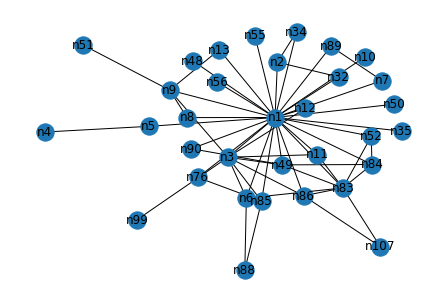

In [4]:
nx.draw(G[3], pos=nx.drawing.nx_agraph.graphviz_layout(G[3]), with_labels=True)  

In [5]:
nx.betweenness_centrality(G[1], normalized = True)

{'n1': 0.9065934065934067,
 'n4': 0.0,
 'n89': 0.14285714285714288,
 'n83': 0.03663003663003663,
 'n3': 0.0,
 'n5': 0.0,
 'n88': 0.053113553113553126,
 'n85': 0.03663003663003663,
 'n90': 0.0,
 'n2': 0.0,
 'n7': 0.0,
 'n54': 0.0,
 'n6': 0.01098901098901099,
 'n64': 0.0,
 'n8': 0.0}

In [6]:
list=dict()
for i in range(1,12):
    l = nx.betweenness_centrality(G[i], normalized = True)
    for a in l:
        if a in list:
            list[a] = list[a]+l[a]
        else:
            list[a] = l[a]
sorted(list.items(), key=lambda item: item[1])[-3:]

[('n3', 1.4234314558060548),
 ('n12', 1.8431833620476192),
 ('n1', 7.205560915225508)]

In [7]:
list=dict()
for i in range(1,12):
    l = nx.eigenvector_centrality(G[i])
    for a in l:
        if a in list:
            list[a] = list[a]+l[a]
        else:
            list[a] = l[a]
sorted(list.items(), key=lambda item: item[1])[-10:]

[('n9', 1.1074841429356448),
 ('n2', 1.2573197822432962),
 ('n87', 1.5518808155533412),
 ('n12', 1.560826914841538),
 ('n8', 1.6763337445575892),
 ('n83', 1.6887398299026029),
 ('n76', 1.8246518890936247),
 ('n85', 2.096729973791198),
 ('n3', 3.2790412945211265),
 ('n1', 6.010301875628366)]

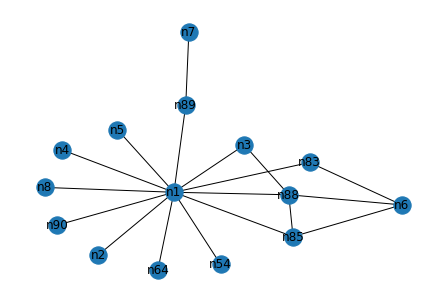

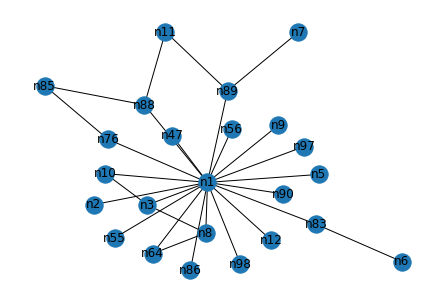

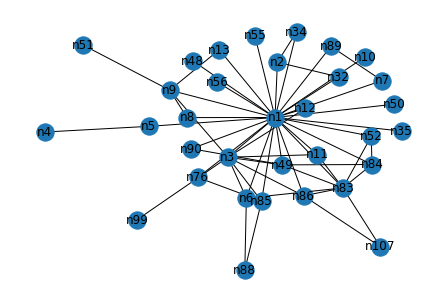

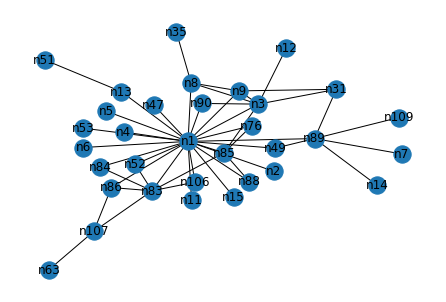

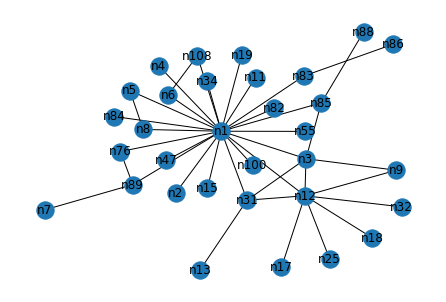

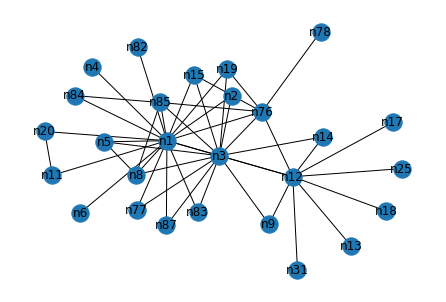

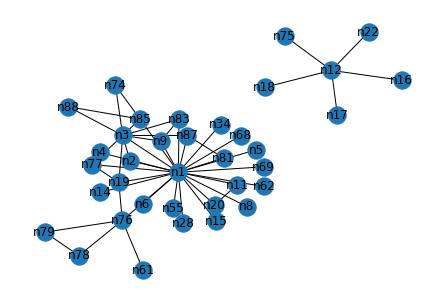

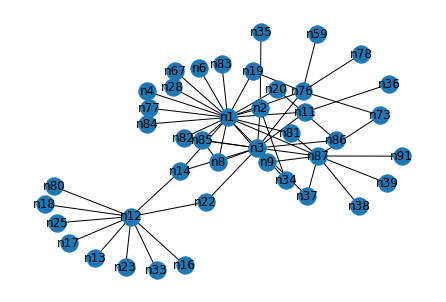

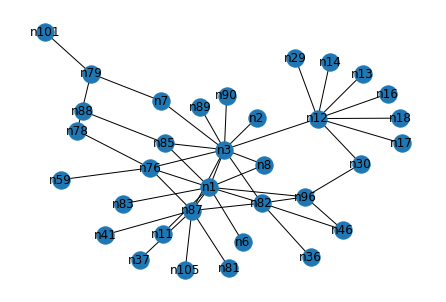

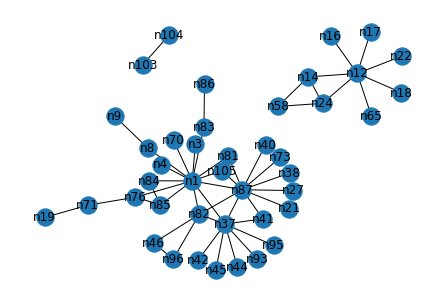

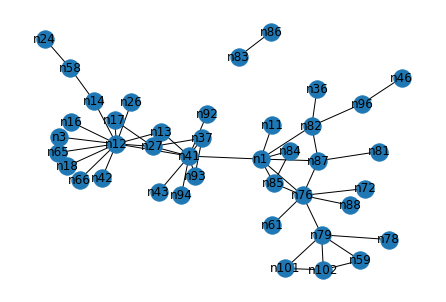

In [11]:
import matplotlib.pyplot as plt
for i in range(1,12):
    plt.figure(i)
    nx.draw(G[i], pos=nx.drawing.nx_agraph.graphviz_layout(G[i]), with_labels=True) 

In [1]:
import pandas as pd
import networkx as nx
phases = {}
G = {}
for i in range(1,12): 
  var_name = "phase" + str(i)
  file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  phases[i][phases[i] > 0] = 1
  G[i] = nx.DiGraph(phases[i])
  G[i].name = var_name

In [21]:
l = nx.algorithms.link_analysis.hits(G[1])
l[1]['n1']

0.07910149056463378

In [41]:
hubs=dict()
auth=dict()
for i in range(1,12):
    l = nx.algorithms.link_analysis.hits(G[i])
    for n in l[0]:
        if n in hubs:
            hubs[n].append(round(l[0][n],3))
        else:
            hubs[n] = list()
            hubs[n].append(round(l[0][n],3))
    for k in l[1]:
        if k in auth:
            auth[k].append(round(l[1][k],3))
        else:
            auth[k] = list()
            auth[k].append(round(l[1][k],3))

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

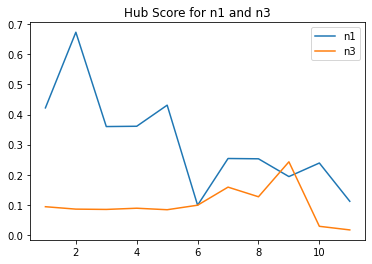

In [63]:
A = [1,2,3,4,5,6,7,8,9,10,11]
sns.lineplot(x=A,y=hubs['n1'])
sns.lineplot(x=A,y=hubs['n3'])
plt.title('Hub Score for n1 and n3')
plt.legend(loc='upper right', labels=['n1', 'n3'])

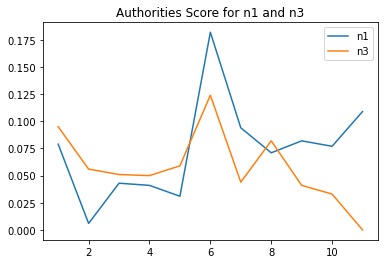

In [65]:
A = [1,2,3,4,5,6,7,8,9,10,11]
sns.lineplot(x=A,y=auth['n1'])
sns.lineplot(x=A,y=auth['n3'])
plt.title('Authorities Score for n1 and n3')
plt.legend(loc='upper right', labels=['n1', 'n3'])